In [3]:
# Download HMDB51 data and splits from serre lab website
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
! wget http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar

--2024-04-19 08:18:18--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Resolving serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)... 128.148.254.114
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar [following]
--2024-04-19 08:18:19--  https://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/hmdb51_org.rar
Connecting to serre-lab.clps.brown.edu (serre-lab.clps.brown.edu)|128.148.254.114|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2124008126 (2.0G)
Saving to: ‘hmdb51_org.rar’

hmdb51_org.rar      100%[===================>]   1.98G  13.8MB/s    in 2m 33s  

2024-04-19 08:20:53 (13.3 MB/s) - ‘hmdb51_org.rar’ saved [2124008126/2124008126]

--2024-04-19 08:20:53--  http://serre-lab.clps.brown.edu/wp-content/uploads/2013/10/test_train_splits.rar
R

In [4]:
! mkdir -p video_data test_train_splits
! unrar e test_train_splits.rar test_train_splits
! rm test_train_splits.rar
! unrar e hmdb51_org.rar
! rm hmdb51_org.rar
! mv *.rar video_data
import os
keep_hmdb51 = ["clap", "climb", "drink", "jump", "pour", "ride_bike", "ride_horse",
        "run", "shoot_bow", "smoke", "throw", "wave"]
for files in os.listdir('video_data'):
    foldername = files.split('.')[0]
    if foldername in keep_hmdb51:
      # extract only the relevant classes for the assignment.
      os.system("mkdir -p video_data/" + foldername)
      os.system("unrar e video_data/"+ files + " video_data/"+foldername)

! rm video_data/*.rar



UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from test_train_splits.rar

Extracting  test_train_splits/brush_hair_test_split1.txt                   0%  OK 
Extracting  test_train_splits/brush_hair_test_split2.txt                   1%  OK 
Extracting  test_train_splits/brush_hair_test_split3.txt                   1%  OK 
Extracting  test_train_splits/cartwheel_test_split1.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split2.txt                    2%  OK 
Extracting  test_train_splits/cartwheel_test_split3.txt                    3%  OK 
Extracting  test_train_splits/catch_test_split1.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split2.txt                        4%  OK 
Extracting  test_train_splits/catch_test_split3.txt                        5%  OK 
Extracting  test_train_splits/chew_test_split1.txt       

In [5]:
!wget http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
!wget http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip

--2024-04-19 08:21:16--  http://vision.stanford.edu/Datasets/Stanford40_JPEGImages.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 304771808 (291M) [application/zip]
Saving to: ‘Stanford40_JPEGImages.zip’

Stanford40_JPEGImag 100%[===================>] 290.65M  9.62MB/s    in 62s     

2024-04-19 08:22:18 (4.70 MB/s) - ‘Stanford40_JPEGImages.zip’ saved [304771808/304771808]

--2024-04-19 08:22:19--  http://vision.stanford.edu/Datasets/Stanford40_ImageSplits.zip
Resolving vision.stanford.edu (vision.stanford.edu)... 171.64.68.10
Connecting to vision.stanford.edu (vision.stanford.edu)|171.64.68.10|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62010 (61K) [application/zip]
Saving to: ‘Stanford40_ImageSplits.zip’

Stanford40_ImageSpl 100%[===================>]  60.56K   120KB/s    in 0.5s    

2024-0

In [6]:
!unzip Stanford40_JPEGImages.zip -d Stanford40/
!unzip Stanford40_ImageSplits.zip -d Stanford40/

Streaming output truncated to the last 5000 lines.
  inflating: Stanford40/JPEGImages/phoning_213.jpg  
  inflating: Stanford40/JPEGImages/phoning_214.jpg  
  inflating: Stanford40/JPEGImages/phoning_215.jpg  
  inflating: Stanford40/JPEGImages/phoning_216.jpg  
  inflating: Stanford40/JPEGImages/phoning_217.jpg  
  inflating: Stanford40/JPEGImages/phoning_218.jpg  
  inflating: Stanford40/JPEGImages/phoning_219.jpg  
  inflating: Stanford40/JPEGImages/phoning_220.jpg  
  inflating: Stanford40/JPEGImages/phoning_221.jpg  
  inflating: Stanford40/JPEGImages/phoning_222.jpg  
  inflating: Stanford40/JPEGImages/phoning_223.jpg  
  inflating: Stanford40/JPEGImages/phoning_224.jpg  
  inflating: Stanford40/JPEGImages/phoning_225.jpg  
  inflating: Stanford40/JPEGImages/phoning_226.jpg  
  inflating: Stanford40/JPEGImages/phoning_227.jpg  
  inflating: Stanford40/JPEGImages/phoning_228.jpg  
  inflating: Stanford40/JPEGImages/phoning_229.jpg  
  inflating: Stanford40/JPEGImages/phoning_230.j

In [7]:
from collections import Counter
import json
from sklearn.model_selection import train_test_split

keep_stanford40 = ["applauding", "climbing", "drinking", "jumping", "pouring_liquid", "riding_a_bike", "riding_a_horse",
        "running", "shooting_an_arrow", "smoking", "throwing_frisby", "waving_hands"]
with open('Stanford40/ImageSplits/train.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    train_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]

with open('Stanford40/ImageSplits/test.txt', 'r') as f:
    # We won't use these splits but split them ourselves
    test_files = [file_name for file_name in list(map(str.strip, f.readlines())) if '_'.join(file_name.split('_')[:-1]) in keep_stanford40]
    test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]

# Combine the splits and split for keeping more images in the training set than the test set.
all_files = train_files + test_files
all_labels = train_labels + test_labels
train_files, test_files = train_test_split(all_files, test_size=0.1, random_state=0, stratify=all_labels)
train_labels = ['_'.join(name.split('_')[:-1]) for name in train_files]
test_labels = ['_'.join(name.split('_')[:-1]) for name in test_files]
print(f'Train files ({len(train_files)}):\n\t{train_files}')
print(f'Train labels ({len(train_labels)}):\n\t{train_labels}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels)).items())}\n')
print(f'Test files ({len(test_files)}):\n\t{test_files}')
print(f'Test labels ({len(test_labels)}):\n\t{test_labels}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels)).items())}\n')
action_categories = sorted(list(set(train_labels)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')
action_categories_dict = {category: index for index, category in enumerate(action_categories)}
print(action_categories_dict)

Train files (2733):
	['drinking_203.jpg', 'smoking_048.jpg', 'running_099.jpg', 'jumping_186.jpg', 'smoking_205.jpg', 'riding_a_bike_090.jpg', 'climbing_184.jpg', 'throwing_frisby_078.jpg', 'applauding_185.jpg', 'throwing_frisby_131.jpg', 'running_241.jpg', 'riding_a_horse_229.jpg', 'throwing_frisby_009.jpg', 'climbing_126.jpg', 'waving_hands_188.jpg', 'shooting_an_arrow_062.jpg', 'riding_a_horse_191.jpg', 'applauding_087.jpg', 'applauding_074.jpg', 'riding_a_bike_181.jpg', 'running_091.jpg', 'riding_a_bike_188.jpg', 'riding_a_bike_027.jpg', 'throwing_frisby_035.jpg', 'climbing_022.jpg', 'applauding_095.jpg', 'waving_hands_024.jpg', 'running_225.jpg', 'climbing_224.jpg', 'riding_a_bike_108.jpg', 'running_050.jpg', 'jumping_089.jpg', 'pouring_liquid_089.jpg', 'climbing_087.jpg', 'applauding_143.jpg', 'jumping_069.jpg', 'waving_hands_039.jpg', 'smoking_019.jpg', 'drinking_030.jpg', 'running_189.jpg', 'climbing_159.jpg', 'climbing_221.jpg', 'drinking_162.jpg', 'drinking_210.jpg', 'riding_

In [8]:
import glob

TRAIN_TAG, TEST_TAG = 1, 2
train_files_hmdb, test_files_hmdb = [], []
train_labels_hmdb, test_labels_hmdb = [], []
split_pattern_name = f"*test_split1.txt"
split_pattern_path = os.path.join('test_train_splits', split_pattern_name)
annotation_paths = glob.glob(split_pattern_path)
for filepath in annotation_paths:
    class_name = '_'.join(filepath.split('/')[-1].split('_')[:-2])
    if class_name not in keep_hmdb51:
        continue  # skipping the classes that we won't use.
    with open(filepath) as fid:
        lines = fid.readlines()
    for line in lines:
        video_filename, tag_string = line.split()
        tag = int(tag_string)
        if tag == TRAIN_TAG:
            train_files_hmdb.append(video_filename)
            train_labels_hmdb.append(class_name)
        elif tag == TEST_TAG:
            test_files_hmdb.append(video_filename)
            test_labels_hmdb.append(class_name)

print(f'Train files ({len(train_files_hmdb)}):\n\t{train_files_hmdb}')
print(f'Train labels ({len(train_labels_hmdb)}):\n\t{train_labels_hmdb}\n'\
      f'Train Distribution:{list(Counter(sorted(train_labels_hmdb)).items())}\n')
print(f'Test files ({len(test_files_hmdb)}):\n\t{test_files_hmdb}')
print(f'Test labels ({len(test_labels_hmdb)}):\n\t{test_labels_hmdb}\n'\
      f'Test Distribution:{list(Counter(sorted(test_labels_hmdb)).items())}\n')
action_categories = sorted(list(set(train_labels_hmdb)))
print(f'Action categories ({len(action_categories)}):\n{action_categories}')

Train files (840):
	['310ToYuma_drink_h_cm_np1_le_goo_3.avi', '310ToYuma_drink_h_nm_np1_fr_goo_2.avi', '310ToYuma_drink_u_nm_np1_le_goo_5.avi', 'A_Beautiful_Mind_1_drink_u_cm_np1_fr_goo_4.avi', 'A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi', 'AllThePresidentMen_drink_f_nm_np2_ri_med_2.avi', 'AllThePresidentMen_drink_h_nm_np1_fr_goo_5.avi', 'AmericanGangster_drink_h_nm_np1_fr_goo_17.avi', 'AmericanGangster_drink_h_nm_np1_fr_goo_69.avi', 'AmericanGangster_drink_h_nm_np1_fr_med_28.avi', 'AmericanGangster_drink_h_nm_np1_ri_bad_4.avi', 'AmericanGangster_drink_h_nm_np1_ri_med_3.avi', 'AmericanGangster_drink_u_cm_np1_fr_med_52.avi', 'AmericanGangster_drink_u_nm_np1_fr_goo_44.avi', 'AmericanGangster_drink_u_nm_np1_fr_goo_67.avi', 'AmericanGangster_drink_u_nm_np1_fr_med_39.avi', 'AmericanGangster_drink_u_nm_np1_le_goo_46.avi', 'BATMAN_BEGINS_drink_h_nm_np1_fr_goo_13.avi', 'BATMAN_BEGINS_drink_u_nm_np1_fr_goo_12.avi', 'BLACK_HAWK_DOWN_drink_h_nm_np1_fr_goo_39.avi', 'BLACK_HAWK_DOWN_drink_u_nm_

In [9]:
action_categories_dict_hmdb = {category: index for index, category in enumerate(action_categories)}
print(action_categories_dict_hmdb)

{'clap': 0, 'climb': 1, 'drink': 2, 'jump': 3, 'pour': 4, 'ride_bike': 5, 'ride_horse': 6, 'run': 7, 'shoot_bow': 8, 'smoke': 9, 'throw': 10, 'wave': 11}


In [10]:
import cv2

def convertoFrames(video_paths, labels):
    frames = []
    for video_path, label in zip(video_paths, labels):
        big_video_path = os.path.join("video_data", label, str(video_path))

        cap = cv2.VideoCapture(big_video_path)

        total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

        cap.set(cv2.CAP_PROP_POS_FRAMES, total_frames / 2)

        ret, frame = cap.read()
        if not ret:
            print(f"Error reading frame from video: {video_path}")
            continue

        video_name = os.path.splitext(os.path.basename(video_path))[0]
        image_name = f"{video_name}.jpg"
        output_dir = "image_data"


        output_path = os.path.join(output_dir, label ,image_name)
        os.makedirs(os.path.join(output_dir, label), exist_ok=True)

        cv2.imwrite(output_path, frame)


        frames.append(frame)
        cap.release()

    return frames

In [11]:
convertoFrames(train_files_hmdb, train_labels_hmdb)
convertoFrames(test_files_hmdb, test_labels_hmdb)

data_dict_train = {
    "files": train_files_hmdb,
    "labels": train_labels_hmdb,
}

data_dict_test = {
    "files": test_files_hmdb,
    "labels": test_labels_hmdb,
}


train_labels_numeric = [action_categories_dict_hmdb[label] for label in train_labels_hmdb]

test_labels_numeric = [action_categories_dict_hmdb[label] for label in test_labels_hmdb]

train_data_list = [{"id_image": file, "label": label} for file, label in zip(train_files_hmdb, train_labels_numeric)]
test_data_list = [{"id_image": file, "label": label} for file, label in zip(test_files_hmdb, test_labels_numeric)]

print(train_data_list)
print(test_data_list)

with open('hmdbtrain.json', 'w') as json_file:
    json.dump(train_data_list, json_file)

with open('hmdbtest.json', 'w') as json_file:
    json.dump(test_data_list, json_file)

[{'id_image': '310ToYuma_drink_h_cm_np1_le_goo_3.avi', 'label': 2}, {'id_image': '310ToYuma_drink_h_nm_np1_fr_goo_2.avi', 'label': 2}, {'id_image': '310ToYuma_drink_u_nm_np1_le_goo_5.avi', 'label': 2}, {'id_image': 'A_Beautiful_Mind_1_drink_u_cm_np1_fr_goo_4.avi', 'label': 2}, {'id_image': 'A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi', 'label': 2}, {'id_image': 'AllThePresidentMen_drink_f_nm_np2_ri_med_2.avi', 'label': 2}, {'id_image': 'AllThePresidentMen_drink_h_nm_np1_fr_goo_5.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_fr_goo_17.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_fr_goo_69.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_fr_med_28.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_ri_bad_4.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_ri_med_3.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_u_cm_np1_fr_med_52.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_u_nm_np1_

In [12]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
from torchvision import datasets
from torchvision.transforms import ToTensor
import torchsummary
import json
from PIL import Image

class Dataset(Dataset):

    def __init__(self, json_filename, stanford, transform=None):
        """
        Arguments:
            json_filename (string): Json file with images paths and labels.
            transform (callable, optional): Optional transform to be applied.
        """
        self.data_list = []
        with open(json_filename, 'r') as file:
          loaded_list = json.load(file)
          print(json_filename)
          print(loaded_list)
          self.data_list.extend(loaded_list)
        self.transform = transform
        self.json_filename = json_filename
        self.stanford= stanford

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, idx):
      label = self.data_list[idx]['label']
      image_aux = self.data_list[idx]['id_image']


      if self.stanford == True:
        directoryone = "Stanford40"
        directorytwo = "JPEGImages"
        img_path =  os.path.join(directoryone, directorytwo, image_aux )
      else: #hmdb
        directoryone = "image_data"
        subdirectories = os.listdir(directoryone)
        subdirectories = [subdir for subdir in subdirectories if subdir != '.ipynb_checkpoints']
        subdirectories.sort()

        #print(subdirectories)
        directorytwo= str(subdirectories[label])
        #print(directorytwo)
        image_aux = image_aux[:-4] + ".jpg"

        img_path =  os.path.join(directoryone, directorytwo, image_aux )

      image = Image.open(img_path)
      if self.transform:
        image = self.transform(image)

      return image, label


# Transforming the image in getitem
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    #transforms.RandomCrop((224,224))
    transforms.Grayscale(num_output_channels=3), # 28x28x1
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])

In [13]:
from torch.utils.data import random_split

def create_data_loaders(train_json, test_json, transform, stanford, batch_size):
    train_dataset = Dataset(train_json, stanford, transform)
    test_dataset = Dataset(test_json, stanford, transform)

    train_size = int(0.9 * len(train_dataset))
    val_size = len(train_dataset) - train_size

    print("Train size: ", train_size, "\nValidation size: ", val_size, "\nTest size: ", len(test_dataset))

    new_train_dataset, new_val_dataset = random_split(train_dataset, [train_size, val_size])

    train_loader = DataLoader(new_train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(new_val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)
    return train_loader, val_loader, test_loader


In [33]:
train_loader_hmdb, val_loader_hmdb, test_loader_hmdb = create_data_loaders("hmdbtrain.json", "hmdbtest.json", transform, False,  batch_size=32)

hmdbtrain.json
[{'id_image': '310ToYuma_drink_h_cm_np1_le_goo_3.avi', 'label': 2}, {'id_image': '310ToYuma_drink_h_nm_np1_fr_goo_2.avi', 'label': 2}, {'id_image': '310ToYuma_drink_u_nm_np1_le_goo_5.avi', 'label': 2}, {'id_image': 'A_Beautiful_Mind_1_drink_u_cm_np1_fr_goo_4.avi', 'label': 2}, {'id_image': 'A_Beautiful_Mind_1_drink_u_nm_np1_ri_goo_6.avi', 'label': 2}, {'id_image': 'AllThePresidentMen_drink_f_nm_np2_ri_med_2.avi', 'label': 2}, {'id_image': 'AllThePresidentMen_drink_h_nm_np1_fr_goo_5.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_fr_goo_17.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_fr_goo_69.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_fr_med_28.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_ri_bad_4.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_h_nm_np1_ri_med_3.avi', 'label': 2}, {'id_image': 'AmericanGangster_drink_u_cm_np1_fr_med_52.avi', 'label': 2}, {'id_image': 'AmericanGangster_

In [34]:
import torch.nn as nn
import torch.optim as optim
from torchvision import models

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def train(model, device, train_loader, optimizer, criterion, epochs = 5):
  training_loss = 0.0

  model.train()
  correct, total = 0, 0
  for batch_idx, (images, labels) in enumerate(train_loader):

      images = images.to(device)
      labels = labels.to(device)
      # Forward Pass
      output = model(images)
      loss = criterion(output, labels)

      # Backward Pass
      loss.backward()
      optimizer.step() # updates model parameters using gradient computings by back propagation and applies the optimization algo
      optimizer.zero_grad()


      _, predicted = output.max(1)
      total += labels.size(0)
      correct += predicted.eq(labels).sum().item()

      training_loss += loss.item()
      if batch_idx % 100 == 99:
          print(f'Batch {batch_idx+1}/{len(train_loader)}, Loss: {loss.item()}')

  training_accuracy = 100 * correct / total
  average_training_loss = training_loss / len(train_loader)
  print(f"Train accuracy: {training_accuracy} %, Average Loss: {average_training_loss}")
  return training_accuracy, average_training_loss


def test(data_loader, model, loss_fn, type_test):
  with torch.no_grad():
      correct, total , loss = 0, 0, 0
      num_batches = len(data_loader)
      model.eval()
      for images, labels in data_loader:
          images = images.to(device)
          labels = labels.to(device)
          outputs = model(images)
          loss += loss_fn(outputs, labels.long() ).item()

          _, predicted = torch.max(outputs.data, 1)
          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  loss /= num_batches
  accuracy = 100*correct/total
  print(f"{type_test} accuracy: {accuracy} %, Average Loss: {loss}")
  return accuracy, loss

In [35]:
from torchvision.models import mobilenet_v2, resnet18, AlexNet
from torchvision.models.efficientnet import EfficientNet
import torchvision.models as models

alex = AlexNet(num_classes=len(action_categories))
alex.to(device)

efficientnet_model = models.efficientnet_b0(num_classes=len(action_categories))
efficientnet_model.to(device)

mobilenet_model = mobilenet_v2(pretrained=False)
mobilenet_model.to(device)

resnet_model = resnet18(pretrained=False)
resnet_model.to(device)

#optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9)

optimizer_alex =  optim.Adam(alex.parameters(), lr=0.003)
optimizer_eff = optim.Adam(efficientnet_model.parameters(), lr=0.001)
mobilenet_optimizer = optim.Adam(mobilenet_model.parameters(), lr=0.003)
resnet_optimizer = optim.Adam(resnet_model.parameters(), lr=0.001)
# All of this model were attempted for Stanford database. However, the best one is resnet, and it is the one that we use

optimizers = [resnet_optimizer]
models = [resnet_model]

criterion = nn.CrossEntropyLoss()




In [37]:
from torch.optim.lr_scheduler import CyclicLR

resnet_model_2 = resnet18(pretrained=False)
resnet_model_2.to(device)

resnet_optimizer_2 = optim.Adam(resnet_model_2.parameters(), lr=0.001)
step_size = 5
base_lr = 0.001  # Minimum learning rate
max_lr = 0.01  # Maximum learning rate
scheduler_2 = CyclicLR(resnet_optimizer_2, base_lr=base_lr, max_lr=max_lr, step_size_up=step_size, cycle_momentum=False)


In [38]:
def run_model(model, optimizer, scheduler, criterion, device, train_loader, val_loader, epochs=30):
    model_result = []
    training_losses = []
    validation_losses = []
    training_accuracies = []
    validation_accuracies = []
    lr_rates = []  # List to store learning rate at each epoch

    print("Model: ", type(model).__name__)
    for t in range(epochs):
        print(f"Epoch {t+1}\n---------------------")
        scheduler.step()  # Update the learning rate
        lr_rates.append(scheduler.get_last_lr()[0])  # Correctly record the current learning rate
        training_accuracy, training_loss = train(model, device, train_loader, optimizer, criterion)
        validation_accuracy, validation_loss = test(val_loader, model, criterion, "Validation")
        training_losses.append(training_loss)
        training_accuracies.append(training_accuracy)
        validation_accuracies.append(validation_accuracy)
        validation_losses.append(validation_loss)
    model_result.append([training_losses, training_accuracies, validation_losses, validation_accuracies, lr_rates])
    return model_result


In [39]:
model_results_hmdb = run_model(resnet_model_2, resnet_optimizer_2, scheduler_2,criterion, device, train_loader_hmdb, val_loader_hmdb,30)

Model:  ResNet
Epoch 1
---------------------
Train accuracy: 11.772486772486772 %, Average Loss: 3.133907993634542
Validation accuracy: 7.142857142857143 %, Average Loss: 11.521492004394531
Epoch 2
---------------------
Train accuracy: 19.576719576719576 %, Average Loss: 2.3654088030258813
Validation accuracy: 23.80952380952381 %, Average Loss: 4.388447284698486
Epoch 3
---------------------
Train accuracy: 19.444444444444443 %, Average Loss: 2.3511958718299866
Validation accuracy: 8.333333333333334 %, Average Loss: 2.7716805934906006
Epoch 4
---------------------
Train accuracy: 22.22222222222222 %, Average Loss: 2.2801440407832465
Validation accuracy: 10.714285714285714 %, Average Loss: 3.628406524658203
Epoch 5
---------------------
Train accuracy: 29.894179894179896 %, Average Loss: 2.106925368309021
Validation accuracy: 11.904761904761905 %, Average Loss: 6.272413412729899
Epoch 6
---------------------
Train accuracy: 28.703703703703702 %, Average Loss: 2.1235987891753516
Validati

In [40]:
print("Cyclical Rate Test Accuracy")
_, _ = test(test_loader_hmdb, resnet_model_2, criterion, "Test")

Cyclical Rate Test Accuracy
Test accuracy: 26.666666666666668 %, Average Loss: 3.11505980292956


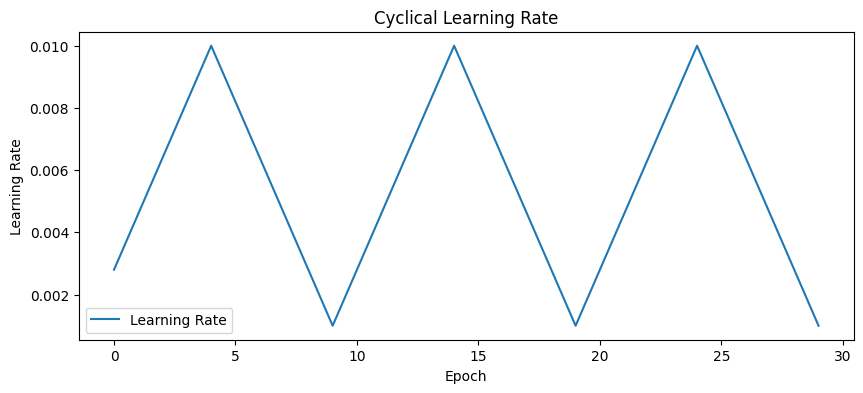

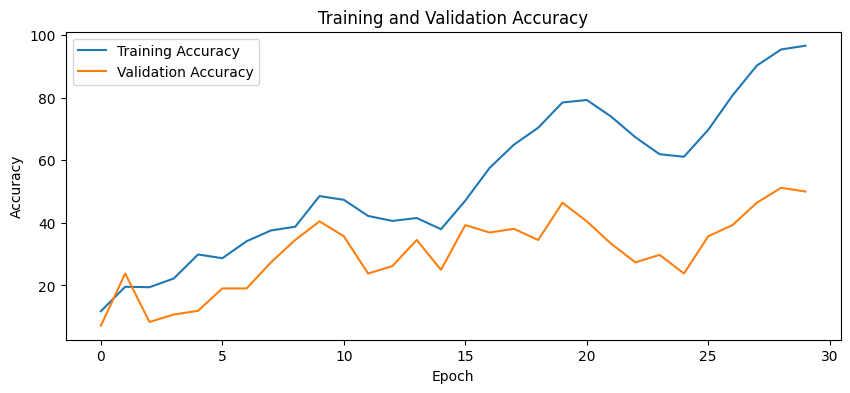

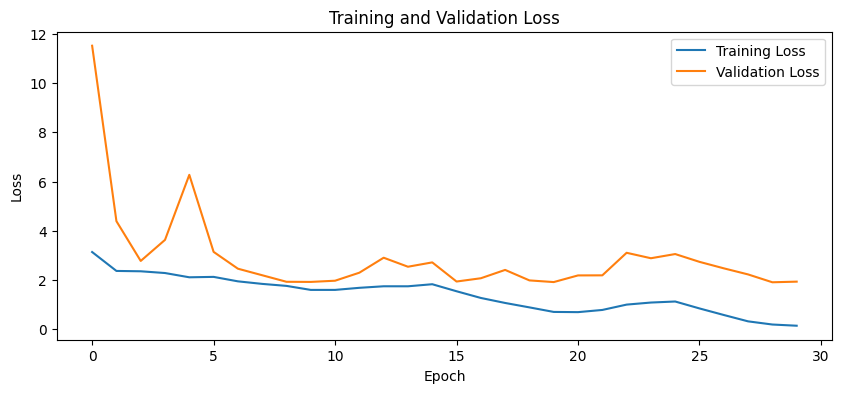

In [41]:
import matplotlib.pyplot as plt

# Assuming model_results_hmdb is the output from run_model function
# and contains learning rates in addition to losses and accuracies.
training_losses, training_accuracies, validation_losses, validation_accuracies, lr_rates = model_results_hmdb[0]

# Plot learning rates
plt.figure(figsize=(10, 4))
plt.plot(lr_rates, label='Learning Rate')
plt.title('Cyclical Learning Rate')
plt.xlabel('Epoch')
plt.ylabel('Learning Rate')
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 4))
plt.plot(training_accuracies, label='Training Accuracy')
plt.plot(validation_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.figure(figsize=(10, 4))
plt.plot(training_losses, label='Training Loss')
plt.plot(validation_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
